<a href="https://colab.research.google.com/github/ohbigkite/2023_LG_AImers/blob/main/%5B%ED%83%9C%EC%97%B0%5D%20Timeseries_kmeans_brand_0812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/LG_Aimers

/content/drive/MyDrive/LG_Aimers


In [ ]:
pip install tslearn

In [ ]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd

In [ ]:
train = pd.read_csv('train.csv').drop(['ID','제품'], axis = 1)

In [ ]:
brand = pd.read_csv('brand_keyword_cnt.csv')

In [ ]:
brand = brand.fillna(0)

In [ ]:
# min-max scaling
numeric_cols = brand.columns[1:]
# 각 column의 min 및 max 계산
min_values = brand[numeric_cols].min(axis=1)
max_values = brand[numeric_cols].max(axis=1)
# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체
ranges = max_values - min_values
ranges[ranges == 0] = 1
# min-max scaling 수행
brand[numeric_cols] = (brand[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)
# max와 min 값을 dictionary 형태로 저장
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()

In [ ]:
brand_data = brand.iloc[:,1:].to_numpy()
brand_data.shape

(3170, 459)

In [ ]:
from tslearn.utils import to_time_series_dataset

X = to_time_series_dataset(brand.iloc[:,1:])

<Axes: xlabel='clusters'>

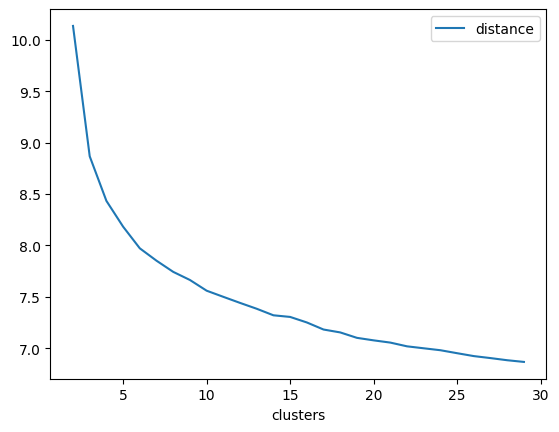

In [ ]:
elbow_data = []
for n_clusters in range (2,30):
    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(X)
    elbow_data.append((n_clusters, km.inertia_))

pd.DataFrame(elbow_data,columns=['clusters', 'distance']).plot(x='clusters',y='distance')
# 6개로 결정

In [ ]:
km = TimeSeriesKMeans(n_clusters=6, random_state=42)
y_pred = km.fit_predict(X)

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([628, 711, 291, 358, 809, 373]))

In [ ]:
cl_brand = brand
cl_brand['cluster'] = y_pred

<ipython-input-18-b4ff195ddd67>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cl_brand['cluster'] = y_pred


In [ ]:
cl_brand

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04,cluster
0,B002-00001,0.214576,0.234817,0.384615,0.655870,0.502025,0.421053,0.323886,0.307693,0.299596,...,0.089069,0.085019,0.117410,0.000000,0.060729,0.068825,0.044535,0.072875,0.105263,0
1,B002-00002,0.230633,0.463479,0.312528,0.233732,0.258521,0.262948,0.208942,0.319610,0.274458,...,0.209827,0.169544,0.162461,0.164675,0.134130,0.127933,0.162904,0.185038,0.192120,0
2,B002-00003,0.004359,0.006707,0.005030,0.000671,0.001677,0.007378,0.006372,0.003353,0.005365,...,0.012743,0.007042,0.005701,0.020456,0.008048,0.017773,0.015091,0.020121,0.017103,4
3,B002-00005,0.094303,0.180747,0.222004,0.208251,0.218075,0.239686,0.176818,0.135560,0.141454,...,0.288801,0.337918,0.271121,0.223969,0.157171,0.131631,0.119843,0.263261,0.261297,0
4,B002-00006,0.000000,0.000000,0.091544,0.119711,0.119711,0.119711,0.183100,0.042244,0.126755,...,0.140844,0.042244,0.000000,0.063378,0.000000,0.000000,0.035211,0.105633,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,B002-03794,0.089677,0.137643,0.182482,0.214807,0.186653,0.193952,0.140772,0.137643,0.148071,...,0.096976,0.120959,0.089677,0.072993,0.065694,0.000000,0.061523,0.103232,0.051095,0
3166,B002-03795,0.625000,0.000000,0.375000,0.312478,0.375000,0.437478,0.312478,0.562478,0.500000,...,0.312478,0.000000,0.437478,0.437478,0.000000,0.000000,0.000000,0.000000,0.000000,3
3167,B002-03796,0.000000,0.000000,0.000000,0.000000,0.000000,0.411736,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294091,0.294091,4
3168,B002-03798,0.138886,0.000000,0.111109,0.069438,0.111109,0.263889,0.208334,0.111109,0.097216,...,0.083332,0.138886,0.166663,0.180547,0.111109,0.111109,0.083332,0.166663,0.097216,1


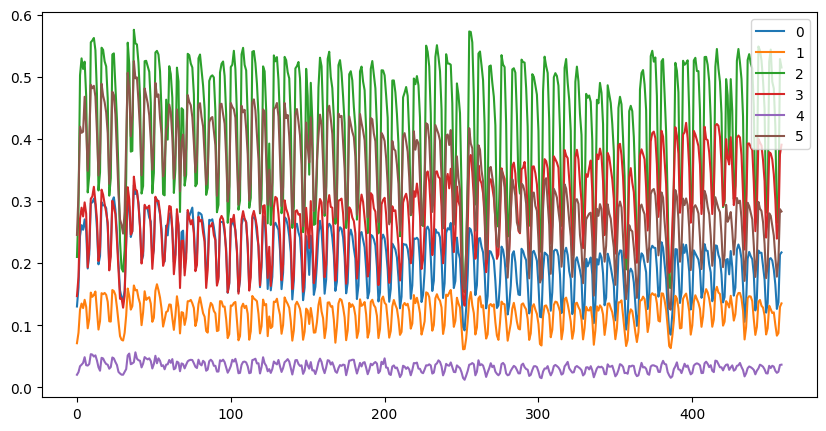

In [ ]:
# 대분류에 따른 시계열 변화 시각화 - 브랜드언급량 평균
import matplotlib.pyplot as plt

big = cl_brand.iloc[:,1:461]
big = big.groupby(['cluster']).mean()

plt.figure(figsize = (10,5))

for i in range(6):
    plt.plot(range(big.shape[1]), big.iloc[i,:], label = big.index[i])
    plt.legend()

In [ ]:
cl_brand.to_csv('brand_clustering.csv', encoding = 'cp949')

In [ ]:
cl_brand.loc[:,['브랜드','cluster']].to_csv('brand_cluster_only.csv', encoding = 'cp949')

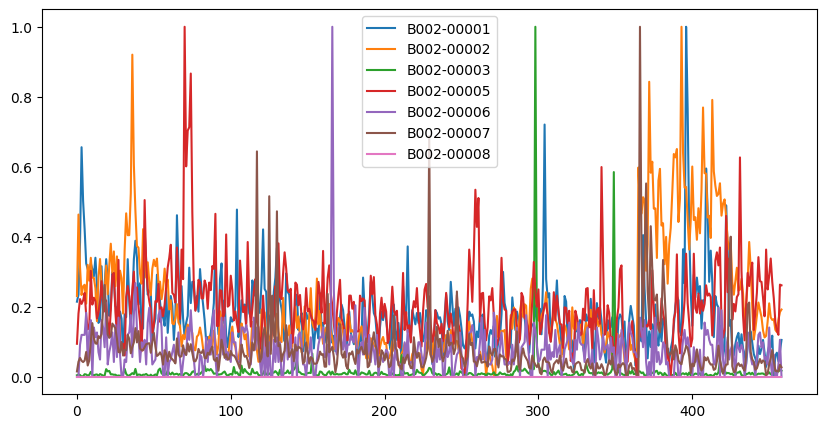

In [ ]:
import matplotlib.pyplot as plt

big = cl_brand.iloc[:,:460]
big = big.groupby(['브랜드']).mean()

plt.figure(figsize = (10,5))

for i in range(7):
    plt.plot(range(big.shape[1]), big.iloc[i,:], label = big.index[i])
    plt.legend()